### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [ ]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m, '\n')
for i in range(len(m[:,0])):print('The mean of ' + str(i+1) +'st row is',  m[i,:].mean())
    
for i in range(len(m[0,:])):print('The mean of ' + str(i+1) +'st coloumn is',  m[:,i].mean())

print('\n\nThe mean of all value on matrix is',  m.mean())


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [ ]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print('using a function:\n')
def prodout (x,y):
    c=[]
    for i in range(len(x)):
        for j in range(len(y)):
                c.append(x[i]*y[j])
    return c

print(np.array(prodout(u,v)).reshape(4,4), '\n')

print('using a list comprehension:\n')
a=np.array( [ [u[i]*v[j] for j in range (len(v))] for i  in range(len(u)) ] )
print(a, '\n\n')


print('using a brodcasting operators: \n')
print(np.tile(u,(4,1)).T * np.tile(v,(4,1)) )

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [ ]:
import numpy.random as npr
import numpy as np
npr.seed(1234)

x = npr.rand(10,6)
mask = x < 0.1
x[mask.any(axis = 1)] = 0
print(x)


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 


x = np.linspace(0,2*np.pi,100)
print(x) 

print(x[::10]) 

print(x[::-1])

print(x[np.abs(np.sin(x)-np.cos(x)) < 0.1]) 
plt.plot(x,np.sin(x),x,np.cos(x))


xclose = x[np.abs(np.sin(x)-np.cos(x)) < 0.1]
plt.scatter(xclose,np.sin(xclose), c = "red")

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [ ]:
multipl = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)
print('The matrix is:\n',multipl, '\n and its trace is:', np.trace(multipl))



print('\nThe anti-diagonal is:', np.diag(multipl[::-1,:]))

mask = [(i-1,i) for i in range (1,10)] 

print('The diagnoal offset by 1 upwards is:', np.diag(multipl,1)) 

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [ ]:
city =np.array(['Chicago', 'Springfield', 'St.Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles'])
distgrid = np.array([0,198,303,736,871,1175,1475,1544,1913,2448])
distgrid = distgrid[:,np.newaxis]

recipr_dist=abs(dist-dist.T)
for i in range(distgrid.shape[0]):
    print('The %i coloumn rappresents -->'%i, city[i], "<--  compared with the other cities' distances (in miles)\n")
print(recipr_dist, '\n\n')



print('In km the previous matrix became:\n\n',np.abs(dist-dist.T)*1.61)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [ ]:
N = 100
mask = np.ones((N,),bool)

mask[0] = mask[1] = False # in questo modo la mask selezionerà i numeri che non resituiscono true

a = np.arange(0,N)
# bisogna adattare la maschera in modo che partendo da due (a[1]) tutti i suoi multipli vengono "segnati", poi si incrementa il punto 
def prime(num,m,n) :
    for i in range(2,n) :
        m[2*i::i] = False 
    return num[m]
def prime_1(num,m,n) :
    for i in range(2,int(n/2)) :
        m[2*i::i] = False
    return num[m]

%timeit prime(a,mask,N)
%timeit prime_1(a,mask,N)
print("prime numbers from 0 to",N,"are\n",prime(a,mask,N),"\n",prime_1(a,mask,N))
# per capire come cambiano le performance al variare di N incrementiamo di un ordine di grandezza
for n in [k*N for k in range(1,3)] :
    %timeit prime(a,mask,n)
    %timeit prime_1(a,mask,n)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [ ]:
# bisogna simulare tanti walkers e considerare ciascuno di loro in una riga di un array insieme alla propria evoluzione temporale. Siano 1000 ognuno che si muove in 200 steps
import numpy.random as npr
import matplotlib.pyplot as plt
npr.seed(1234) 
walkers = np.array([npr.choice([-1,1]) for i in range(0,200000)]).reshape(1000,200)


walksum = np.array([npr.choice([-1,1]) for i in range(0,200000)]).reshape(1000,200)
for i in range(1,200) : 
    walksum[:,i] += walksum[:,i-1] 

    
means = np.mean(walksum**2, axis = 0)
%matplotlib inline
t = np.linspace(0,200,200)

plt.plot(t,np.sqrt(means))

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

The main statistical properties for hares are:
sum 715700.0
min 7600.0
argmin 17
mean 34080.95238095238
median 25400.0
std 20897.906458089667
The main statistical properties for lynxes are:
sum 423500.0
min 4000.0
argmin 0
mean 20166.666666666668
median 12300.0
std 16254.591536908763
The main statistical properties for carrots are:
sum 890400.0
min 36700.0
argmin 16
mean 42400.0
median 41800.0
std 3322.5062255844787
Max populations over years
Carrots  ---> 1900
Carrots  ---> 1901
Hares  ---> 1902
Hares  ---> 1903
Lynxes  ---> 1904
Lynxes  ---> 1905
Carrots  ---> 1906
Carrots  ---> 1907
Carrots  ---> 1908
Carrots  ---> 1909
Carrots  ---> 1910
Carrots  ---> 1911
Hares  ---> 1912
Hares  ---> 1913
Hares  ---> 1914
Lynxes  ---> 1915
Carrots  ---> 1916
Carrots  ---> 1917
Carrots  ---> 1918
Carrots  ---> 1919
Carrots  ---> 1920


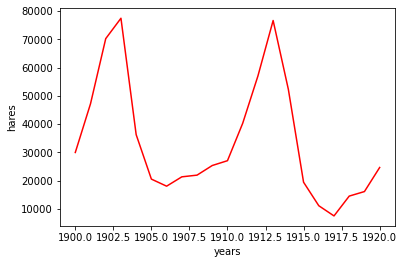

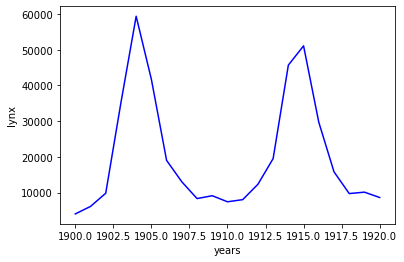

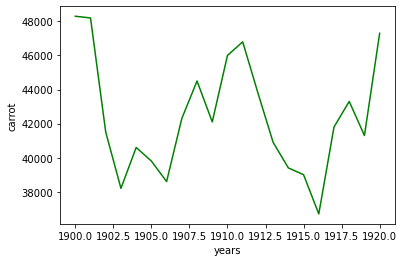

In [1]:
import numpy as np
import matplotlib.pyplot as plt


population = np.loadtxt("populations.txt", skiprows=1)

year = population[:,0]
hares = population[:,1]
lynxes = population[:,2]
carrots = population[:,3]


plt.figure()
plt.plot(year,hares, 'r')
plt.xlabel('years')
plt.ylabel('hares')

plt.figure()
plt.plot(year,lynxes, 'b')
plt.xlabel('years')
plt.ylabel('lynx')

plt.figure()
plt.plot(year,carrots, 'g')
plt.xlabel('years')
plt.ylabel('carrot')

print("The main statistical properties for hares are:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(hares)) # 
print("The main statistical properties for lynxes are:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(lynxes)) 
print("The main statistical properties for carrots are:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(carrots))
    
titles=['Hares','Lynxes','Carrots']   
print("Max populations over years")
for i in population :
    print(titles[np.argmax(i[1:])]," --->",int(i[0]),)